In [1]:
import pyforest
from icecream import ic
rng = np.random.default_rng(42)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

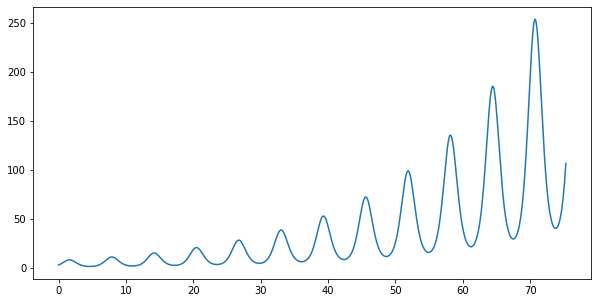

In [2]:
# generate synthethic data

x = np.arange(0,24*np.pi,0.1)
y = np.exp(np.sin(x)+0.05 * x + 1)

# inject random noise
# arbitrary_magnitude = 6
# y = (rng.random(len(x)) * 2 - 1) * arbitrary_magnitude + y

# plot it
plt.figure(figsize=(10,5))
plt.plot(x,y);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

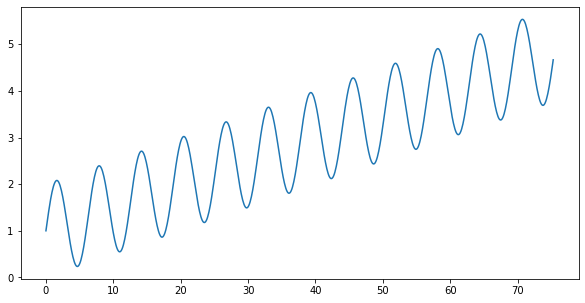

In [3]:
# take the log
plt.figure(figsize=(10,5))
plt.plot(x,np.log(y));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

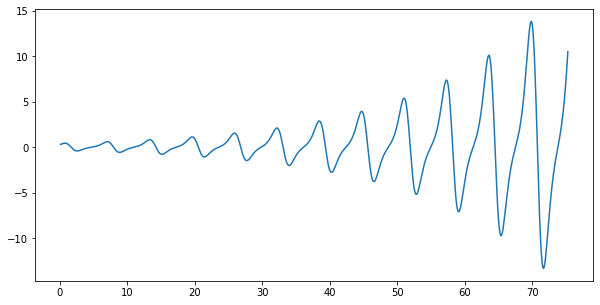

In [4]:
# take the diff
diffy = np.diff(y, n=1)

plt.figure(figsize=(10,5))
plt.plot(x[1:], diffy);


In [5]:
ic(len(y))
ic(len(diffy));

ic| len(y): 754
ic| len(diffy): 753


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

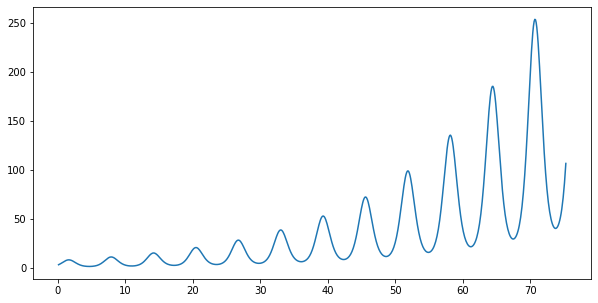

In [6]:
# inverting the diff (by itself)
plt.figure(figsize=(10,5))
plt.plot(x[1:], y[:-1] + diffy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

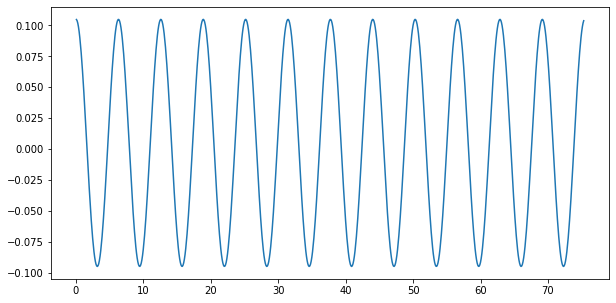

In [7]:
# taking the diff of the log and we're left with a base sinusoid
ylog = np.log(y)
ydifflog = np.diff(ylog)

plt.figure(figsize=(10,5))
plt.plot(x[1:], ydifflog)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

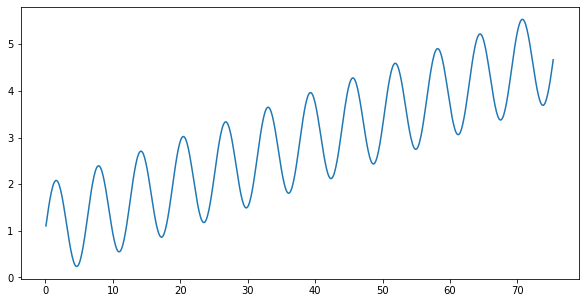

In [8]:
# inverting the diff
plt.figure(figsize=(10,5))
plt.plot(x[1:], ylog[:-1] + ydifflog)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

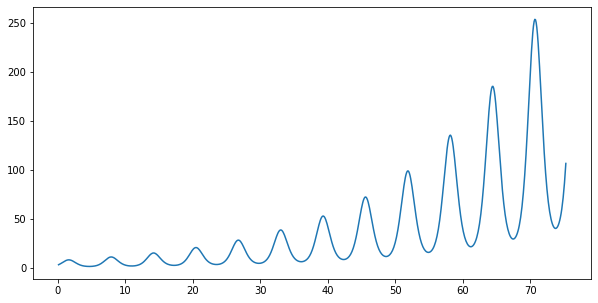

In [9]:
# inverting the diff and then inverting the log to get us back to the original
plt.figure(figsize=(10,5))
plt.plot(x[1:], np.exp(ylog[:-1] + ydifflog))

# Some Notes

Lag 1 will mean that we will have lost 1 measurement forever.  That's why we see the adjustments `[:-1]`
You can adjust it for the magnitude of the lag


In [10]:
# test the "first" values are the same
np.exp(ylog[:-1] + ydifflog)[0] == y[1]

<IPython.core.display.Javascript object>

True

In [11]:
# test the last values are the same
np.exp(ylog[:-1] + ydifflog)[-1] == y[-1]

<IPython.core.display.Javascript object>

True

In [12]:
# test that all the values are the same
np.all(np.exp(ylog[:-1] + ydifflog) == y[1:])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True